In [7]:
import pandas as pd

In [8]:
churned = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [10]:

has_churned = pd.DataFrame(has_churned)
print(has_churned)

    0
0   1
1   1
2   0
3   0
4   1
5   0
6   0
7   0
8   0
9   0
10  0


In [11]:
has_churned['baseline'] = has_churned[0].value_counts().idxmax()

In [13]:
(has_churned[0] == has_churned['baseline']).mean()

0.7272727272727273

In [18]:
has_churned


,0,baseline
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [17]:
pd.crosstab(has_churned[0], has_churned['baseline'])

baseline,0
0,
0,8
1,3


In [ ]:
Accuracy
How many correct guesses over total number of guesses

Precision
Of all the times I guess the positive case, how many times am I correct?

TP / (TP + FP)


Recall
Of all actual positive cases, how many did I correctly identify?

TP / (TP + FN)

Sensitivity: aka True Positive Rate; how good is our 
model when the actual value is positive? recall for the positive class

In [1]:
from random import randint

# moves to make
moves = ['Rock', 'Paper', 'Scissors']

# computer moves
computer_moves = moves[randint(0,2)]

# player is false
player = False

# while loop
while player == False:
    player = input("Rock, Paper, Scissors? ")
    if player == computer_moves:
        print('Tie!, choose again.')
    elif player == 'Rock':
        if computer_moves == 'Paper':
            print('You lose!', computer_moves, 'covers', player)
        else:
            print('You Win!', player, 'smashes', computer_moves)
    elif player == 'Paper':
        if computer_moves == 'Scissors':
            print('You lose!', computer_moves, 'cuts', player)
        else:
            print('You Win!', player, 'covers', computer_moves)
    elif player == 'Scissors':
        if computer_moves == 'Rock':
            print('You lose!', computer_moves, 'smashes', player)
        else:
            print('You Win!', player, 'cuts', computer_moves)
    else:
        print('Not a valid play! Check your spelling and try again.')

    #player was set to True, but we want it to be False so the loop continues
    player = False
    computer_moves = moves[randint(0,2)]

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# machine learning imports 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# import premade functions
import prepare
import acquire
import modeling

#Removes big scary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import acquired messy data
telco = acquire.get_telco_data()
# Lets take a quick peak
telco.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check


In [3]:
# Import prepare function to clean data 
telco = prepare.prep_telco(telco)
# Quick peak into the cleaned data
telco.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.3,One year,DSL,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [5]:
# splitting data into train, validate, and test
train, val, test = prepare.my_train_test_split(telco, 'churn_Yes')
# lets see the shape of these
train.shape, val.shape, test.shape

((4225, 30), (1409, 30), (1409, 30))

In [71]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,0,26,39.95,1023.75,One year,DSL,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2479,3547-LQRIK,0,47,26.90,1250.85,One year,None,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5889,8280-MQRQN,0,1,50.45,50.45,Month-to-month,DSL,1,0,0,...,1,0,0,1,0,0,0,0,0,1
6087,8626-PTQGE,0,69,60.05,4176.70,Two year,DSL,0,1,0,...,0,0,1,1,0,0,1,0,0,0
785,1142-IHLOO,0,51,87.55,4475.90,One year,Fiber optic,0,0,0,...,0,1,0,0,1,0,0,1,0,0


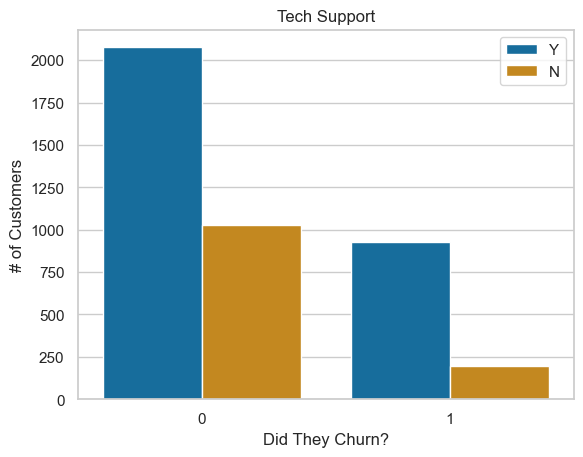

In [76]:
# using a countplot to give a visual 
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="tech_support_Yes", palette="colorblind")
#labels and legend
plt.title('Tech Support')
plt.xlabel('Did They Churn?')
plt.ylabel('# of Customers')
plt.legend('YN')
plt.savefig('tech_support.png')

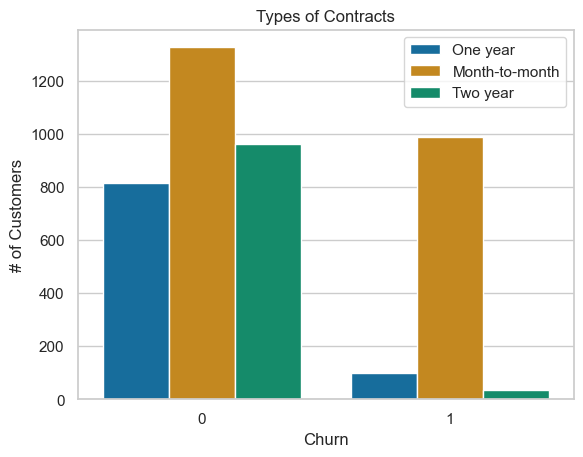

In [33]:
# trusty count plot for visual
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="contract_type", palette="colorblind")
#labels and legend
plt.title('Types of Contracts')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()
plt.savefig('telco_contracts.png')

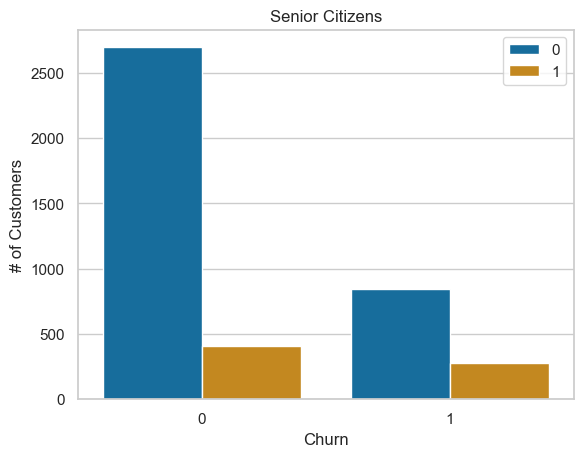

In [65]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="senior_citizen", palette="colorblind")
#labels and legend
plt.title('Senior Citizens')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

In [79]:
# lets prep for modeling
X_train = train.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_train = train.churn_Yes

X_val = val.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_val = val.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'contract_type', 'customer_id', 'internet_service_type'])
y_test = test.churn_Yes
#dont forget the seed
seed=42

In [80]:
# Logistic Regression algorithm
logit2 = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver='lbfgs')

#fit the model
logit2.fit(X_train, y_train)
#clean f string
print('Logistic Regression Model')
print(f"Accuracy of Logistic Regression on train: {logit2.score(X_train, y_train)}") 
print(f"Accuracy of Logistic Regression on validate: {logit2.score(X_val, y_val)}")

Logistic Regression Model
Accuracy of Logistic Regression on train: 0.8009467455621302
Accuracy of Logistic Regression on validate: 0.8168914123491838


In [81]:
# best Logistic Regression algorithm 

test_score = logit2.score(X_test, y_test)

# clean f string
print('Random Forest Model')
print(f'Accuracy on Test {test_score:.2f}')

Random Forest Model
Accuracy on Test 0.82


In [87]:
# code to generate baseline 
telco['baseline'] = telco['churn_Yes'].value_counts().idxmax()
(telco['churn_Yes'] == telco['baseline']).mean()
# clean f string
print(f"Baseline: {(telco['churn_Yes'] == telco['baseline']).mean()*100:.2f}%")

Baseline: 73.46%


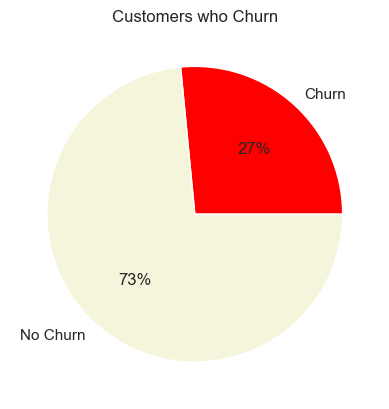

<Figure size 640x480 with 0 Axes>

In [106]:
# set values and labels for chart
values = [len(train[train['churn_Yes'] == 1]), len(train[train['churn_Yes'] == 0])] 
labels = ['Churn','No Churn', ] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['red', 'beige'])
plt.title('Customers who Churn')
plt.show()
plt.savefig('telco_churn_pie.png')